> 다중선형회귀모형

## 1. 라이브러리 불러오기

In [2]:
library(MASS)

In [3]:
options(repr.plot.width = 15, repr.plot.height = 6)

## 2. 보스턴 집값 데이터 분석

In [4]:
data(Boston)  ## 라이브러리에서 데이터를 불러오는 코드
head(Boston)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
6,0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


`-` 산점도 행렬

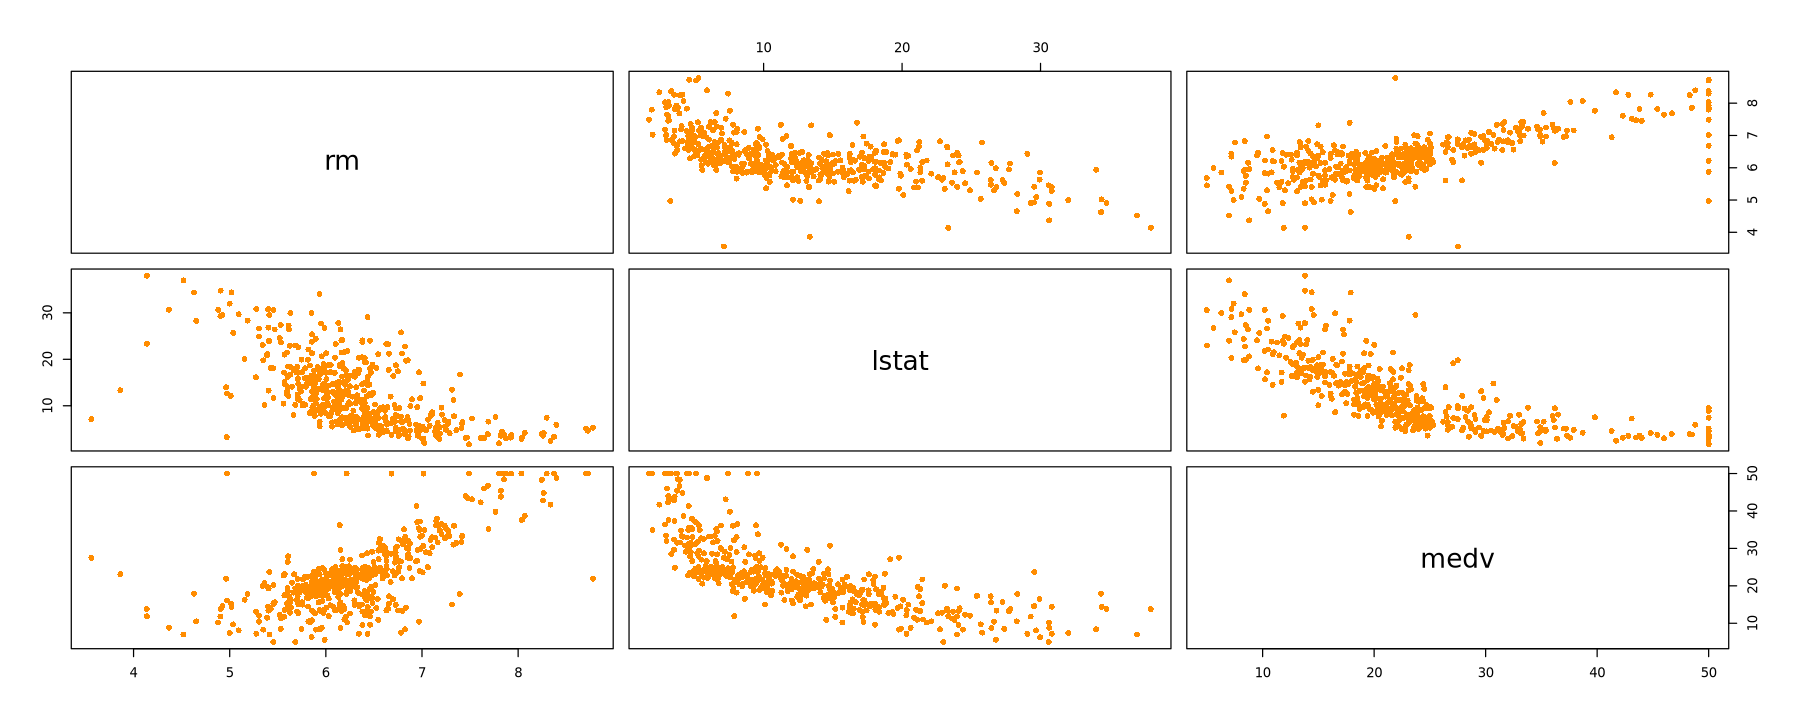

In [11]:
pairs(Boston[, which(names(Boston) %in% c('medv','rm','lstat'))],
     pch = 16, col = 'darkorange')

## %in% : 파이썬의 in과 완전히 동일한 역할. bool의 list를 만들어줬음

* 상관계수

In [12]:
cor(Boston[, which(names(Boston) %in% c('medv', 'rm', 'lstat'))])

,rm,lstat,medv
rm,1.0000000,-0.6138083,0.6953599
lstat,-0.6138083,1.0000000,-0.7376627
medv,0.6953599,-0.7376627,1.0000000


`-` 회귀모형 적합

* 쓸 변수만 슬라이싱

In [14]:
Boston2 <- Boston[, c('rm', 'lstat', 'medv')]
head(Boston2)

,rm,lstat,medv
,<dbl>,<dbl>,<dbl>
1,6.575,4.98,24.0
2,6.421,9.14,21.6
3,7.185,4.03,34.7
4,6.998,2.94,33.4
5,7.147,5.33,36.2
6,6.430,5.21,28.7


> 순서대로 방의 크기, 저소득층 비율, 주택 가격의 중앙값(1,000달러)

* 적합해보자...

In [15]:
fit_Boston <- lm(medv~., data = Boston2)  ## 일일히 +로 추가하지 않고 전부 하려면 .으로 하면 된다.
summary(fit_Boston)


Call:
lm(formula = medv ~ ., data = Boston2)

Residuals:
    Min      1Q  Median      3Q     Max 
-18.076  -3.516  -1.010   1.909  28.131 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.35827    3.17283  -0.428    0.669    
rm           5.09479    0.44447  11.463   <2e-16 ***
lstat       -0.64236    0.04373 -14.689   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.54 on 503 degrees of freedom
Multiple R-squared:  0.6386,	Adjusted R-squared:  0.6371 
F-statistic: 444.3 on 2 and 503 DF,  p-value: < 2.2e-16


> 모형 및 계수는 수준 0.05에서 통계적으로 유의하다.

`-` 손계산!

In [16]:
## matrix

n <- nrow(Boston)
X <- cbind(1, Boston$rm, Boston$lstat)
y <- Boston$medv

n
head(X)
head(y)

[1] 506

1,6.575,4.98
1,6.421,9.14
1,7.185,4.03
1,6.998,2.94
1,7.147,5.33
1,6.430,5.21


[1] 24.0 21.6 34.7 33.4 36.2 28.7

* 계수 구하기

In [18]:
beta_hat <- solve(t(X)%*%X)%*%t(X)%*%y
beta_hat

fit_Boston$coefficients

-1.3582728
5.0947880
-0.6423583


(Intercept)          rm       lstat 
 -1.3582728   5.0947880  -0.6423583

> `fit_Boston`에 저장된 계수값과 동일함을 알 수 있다.

In [22]:
y_hat <- X%*%beta_hat
y_hat[1:5]  ## 예측값
fitted(fit_Boston)[1:5]  ## 당연히 동일함

[1] 28.94101 25.48421 32.65907 32.40652 31.63041

1        2        3        4        5 
28.94101 25.48421 32.65907 32.40652 31.63041

In [25]:
sse <- sum((y - y_hat)^2)
sqrt(sse/(n-2-1))  ## RMSE
summary(fit_Boston)$sigma  ## 똑가틈

[1] 5.540257

[1] 5.540257

`-` 분산분석

In [26]:
anova(fit_Boston)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
rm,1,20654.42,20654.41622,672.9039,8.266887e-95
lstat,1,6622.57,6622.56999,215.7579,6.669365e-41
Residuals,503,15439.31,30.69445,NA,NA


> 무지성으로 각각 나온다. 개별로 F검정 하라고?

In [27]:
null_model <- lm(medv~1, data = Boston2)  ## 귀무가설 하에서의 모형
fit_Boston <- lm(medv~., data = Boston2)  ## 대립가설 하에서의 모형

anova(null_model, fit_Boston)  ## 두 모델간 비교

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,505,42716.30,NA,NA,NA,NA
2,503,15439.31,2,27276.99,444.3309,7.008455e-112


> `fit_Boston`과 영가설의 모델을 비교했다.

* 검정

In [31]:
anova(fit_Boston)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
rm,1,20654.42,20654.41622,672.9039,8.266887e-95
lstat,1,6622.57,6622.56999,215.7579,6.669365e-41
Residuals,503,15439.31,30.69445,NA,NA


In [33]:
## F = MSR/MSE
MSE <- anova(fit_Boston)[3,3]  ## 기본 anova table에서의 (3,3)의 값
SSR <- anova(null_model, fit_Boston)[2,4]  ## 영가설에서의 모델과 비교했을 때의 회귀제곱합, 값 두개 더해도 됨
MSR <- SSR/2

F <- MSR/MSE
df(F, df1 = 2, df2 = 500)

[1] 4.464302e-112

> 유의확률이 아주 작기 때문에 귀무가설을 기각할 수 있다. 즉 회귀모형은 유의하다고 말할 수 있다.

`-` $\hat{\beta}$의 공분산행렬

In [34]:
vcov(fit_Boston)  ## 모듈로 정의

,(Intercept),rm,lstat
(Intercept),10.06683612,-1.39248641,-0.099178133
rm,-1.39248641,0.19754958,0.011930670
lstat,-0.09917813,0.01193067,0.001912441


In [36]:
solve(t(X)%*%X)*MSE  ## 손계산...

10.06683612,-1.39248641,-0.099178133
-1.39248641,0.19754958,0.011930670
-0.09917813,0.01193067,0.001912441


`-` 평균반응, 개별 y의 추정

In [38]:
new_dt <- data.frame(rm = 7, lstat = 10)  ## 새로운 데이터, 열 이름은 똑같아야지...

predict(fit_Boston, newdata = new_dt)  ## 함수적 계산
c(1, 7, 10)%*%beta_hat  ## 손계산

1 
27.88166

27.88166


`-` 절편을 포함하지 않는 회귀직선(원점을 지나는 회귀직선)

In [39]:
fit_Boston0 <- lm(medv ~ 0 + ., data = Boston2)

In [40]:
summary(fit_Boston0)


Call:
lm(formula = medv ~ 0 + ., data = Boston2)

Residuals:
    Min      1Q  Median      3Q     Max 
-17.714  -3.498  -1.075   1.877  27.750 

Coefficients:
      Estimate Std. Error t value Pr(>|t|)    
rm     4.90691    0.07019   69.91   <2e-16 ***
lstat -0.65574    0.03056  -21.46   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.536 on 504 degrees of freedom
Multiple R-squared:  0.9485,	Adjusted R-squared:  0.9482 
F-statistic:  4637 on 2 and 504 DF,  p-value: < 2.2e-16
